In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import os
os.chdir('/content/drive/MyDrive/ProgettiDataScience-SAD/1 ANNO 2 SEMESTRE/DATA SEMANTICS/Progetto/Newspaper')

# Topic modeling

In [ ]:
import string
BASE_PATH = '/content/drive/MyDrive/ProgettiDataScience-SAD/1 ANNO 2 SEMESTRE/DATA SEMANTICS/Progetto/Newspaper/'

def simple_preproc(text):
  return text.translate(str.maketrans('', '', string.punctuation))

with open(BASE_PATH + 'text_news_nne/text_news_2002.txt') as read_file:
  sentences2002 = [simple_preproc(k).lower().split() for k in read_file.readlines()]
with open(BASE_PATH + 'text_news_nne/text_news_2003.txt') as read_file:
  sentences2003 = [simple_preproc(k).lower().split() for k in read_file.readlines()]
with open(BASE_PATH + 'text_news_nne/text_news_2004.txt') as read_file:
  sentences2004 = [simple_preproc(k).lower().split() for k in read_file.readlines()]
with open(BASE_PATH + 'text_news_nne/text_news_2005.txt') as read_file:
  sentences2005 = [simple_preproc(k).lower().split() for k in read_file.readlines()]
with open(BASE_PATH + 'text_news_nne/text_news_2006.txt') as read_file:
  sentences2006 = [simple_preproc(k).lower().split() for k in read_file.readlines()]

sentences0206 = sentences2002 + sentences2003 + sentences2004 + sentences2005 + sentences2006

In [ ]:
# deleted <p> that indicate the start of a paragraph

for i in (range(len(sentences0206))):
  count = sentences0206[i].count('p')
  if(count > 0):
    for j in range(count):
      sentences0206[i].remove('p')
      # print(i)
  else:
    sentences0206[i]

# deleted s

for i in (range(len(sentences0206))):
  count = sentences0206[i].count('s')
  if(count > 0):
    for j in range(count):
      sentences0206[i].remove('s')
      # print(i)
  else:
    sentences0206[i]


# deleted 's

for i in (range(len(sentences0206))):
  count = sentences0206[i].count('\'s')
  if(count > 0):
    for j in range(count):
      sentences0206[i].remove('\'s')
      # print(i)
  else:
    sentences0206[i]


# deleted 'nt

for i in (range(len(sentences0206))):
  count = sentences0206[i].count('nt')
  if(count > 0):
    for j in range(count):
      sentences0206[i].remove('nt')
      # print(i)
  else:
    sentences0206[i]

In [ ]:
import spacy
sp = spacy.load('en_core_web_sm')

all_stopwords = set(sp.Defaults.stop_words)
stop_word = sentences0206.copy()
important_words = stop_word.copy()
for i in (range(len(stop_word))):
  stop_word[i] = [i for i in sentences0206[i] if str(i).lower() not in all_stopwords]
  important_words[i] = [i for i in stop_word[i] if i.isalpha()]

In [ ]:
# create a new list called my_new_list
my_new_list = []
# iterate over the outer list
for sub_list in important_words:
# go over each item of the sublist
    for item in sub_list:
# append it to our new list
        my_new_list.append(item)


lista_vuota = ['1']
nuova_lista = []
nuova_lista.append(lista_vuota)
nuova_lista.append(my_new_list)

In [ ]:
import gensim.corpora as corpora
# Create Dictionary
id2word = corpora.Dictionary(nuova_lista)

# Create Corpus
texts = nuova_lista.copy()

# Term Document Frequency
corpus = [id2word.doc2bow(text) for text in texts]

In [ ]:
from pprint import pprint
import gensim

# number of topics
num_topics = 10
# Build LDA model
lda_model = gensim.models.LdaMulticore(corpus=corpus,
                                       id2word=id2word,
                                       num_topics=num_topics)
# Print the Keyword in the 10 topics
pprint(lda_model.print_topics(num_words=10))
doc_lda = lda_model[corpus]

[(0,
  '0.011*"said" + 0.005*"says" + 0.004*"new" + 0.003*"years" + 0.003*"people" '
  '+ 0.003*"year" + 0.003*"time" + 0.003*"like" + 0.002*"mr" + 0.002*"state"'),
 (1,
  '0.009*"said" + 0.005*"new" + 0.004*"people" + 0.004*"says" + 0.003*"time" + '
  '0.003*"like" + 0.003*"year" + 0.002*"years" + 0.002*"state" + 0.002*"mr"'),
 (2,
  '0.009*"said" + 0.004*"says" + 0.004*"new" + 0.003*"time" + 0.003*"year" + '
  '0.003*"like" + 0.003*"years" + 0.003*"people" + 0.002*"mr" + 0.002*"state"'),
 (3,
  '0.006*"said" + 0.004*"like" + 0.003*"people" + 0.003*"says" + 0.003*"years" '
  '+ 0.003*"new" + 0.003*"time" + 0.002*"million" + 0.002*"year" + 0.002*"m"'),
 (4,
  '0.011*"said" + 0.005*"says" + 0.004*"new" + 0.003*"like" + 0.003*"people" + '
  '0.003*"year" + 0.003*"time" + 0.003*"years" + 0.002*"state" + 0.002*"way"'),
 (5,
  '0.009*"said" + 0.005*"says" + 0.004*"new" + 0.003*"people" + 0.003*"time" + '
  '0.003*"year" + 0.003*"years" + 0.003*"like" + 0.002*"think" + 0.002*"home"'),
 (6,
 

# PRE-PROCESSING

## Selection of articles that contain at least one keyword

In [ ]:
!pip install -U word_forms

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from word_forms.word_forms import get_word_forms
import nltk
nltk.download('omw-1.4')

# generate all possible forms of keywords
# keyword_list = ['bin laden', 'al qaeda', 'world trade center', 'twin towers', 'attack', 'hijack', 'firefighter', 'airplane', 'terrorism', 'afghanistan', 'jihad', 'islam']
word_form_tower = get_word_forms("tower")
word_form_attack = get_word_forms("attack")
word_form_hijack = get_word_forms("hijack")
word_form_firefighter = get_word_forms("firefighter")
word_form_airplane = get_word_forms("airplane")
word_form_terrorism = get_word_forms("terrorism")


word_form_tot = (list(list(word_form_tower['a']) + list(word_form_tower['n']) + 
list(word_form_tower['v']) + list(word_form_tower['r']) + 
list(word_form_attack['a']) + list(word_form_attack['n']) + 
list(word_form_attack['v']) + list(word_form_attack['r']) + 
list(word_form_airplane['a']) + list(word_form_airplane['n']) + 
list(word_form_airplane['v']) + list(word_form_airplane['r']) + 
list(word_form_hijack['a']) + list(word_form_hijack['n']) + 
list(word_form_hijack['v']) + list(word_form_hijack['r']) + 
list(word_form_firefighter['a']) + list(word_form_firefighter['n']) + 
list(word_form_firefighter['v']) + list(word_form_firefighter['r']) + 
list(word_form_terrorism['a']) + list(word_form_terrorism['n']) + 
list(word_form_terrorism['v']) + list(word_form_terrorism['r'])))

[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


In [ ]:
# word_form_tot

In [ ]:
# import string
import re

BASE_PATH = '/content/drive/MyDrive/ProgettiDataScience-SAD/1 ANNO 2 SEMESTRE/DATA SEMANTICS/Progetto/Newspaper/'


with open(BASE_PATH + 'text_news_nne/text_news_2002.txt') as read_file1:
  sentences2002 = read_file1.readlines()
with open(BASE_PATH + 'text_news_nne/text_news_2003.txt') as read_file2:
  sentences2003 = read_file2.readlines()
with open(BASE_PATH + 'text_news_nne/text_news_2004.txt') as read_file3:
  sentences2004 = read_file3.readlines()
with open(BASE_PATH + 'text_news_nne/text_news_2005.txt') as read_file4:
  sentences2005 = read_file4.readlines()
with open(BASE_PATH + 'text_news_nne/text_news_2006.txt') as read_file5:
  sentences2006 = read_file5.readlines()

sentences0206 = sentences2002 + sentences2003 + sentences2004 + sentences2005 + sentences2006

  
#define the list of words of our interest
keywords = ['bin laden', 'al qaeda', 'twin towers', 'world trade center', 'afghanistan', 'jihad', 'islam'] #aggiungere twin towers

keyword_list = keywords + word_form_tot

#define the dictionary where we store the articles
articles = {}
art = {}
#remove the p that represent in html the start of the paragraph
for symbol in sentences0206:
  symbol = symbol.replace('<p>', '')
  #selection of articles that contain the keywords
  for keyword in keyword_list:
    if (keyword in symbol.lower()):
      #select id of the article that contains at least one kwyword 
      id = re.findall(r'@@(\w+)', symbol)[0]
      articles[id] = symbol.lower()
      art[id] = symbol.lower()

print(len(articles))

7882


In [ ]:
#check if list of articles contains duplicates by their id

def check_duplicate(l):
    mySet = set(l)
    if len(mySet) == len(l):
        print("List has no duplicate elements.")
    else:
        print("The list contains duplicate elements")

check_duplicate(articles.keys())

List has no duplicate elements.


## Tokenization & stop-word removal

Dictionary for every article that contains the keywords

In [ ]:
import spacy
import nltk
sp = spacy.load('en_core_web_sm')
all_stopwords = sp.Defaults.stop_words

for id in articles:
  #tokenization
  token_sentences0206 = articles[id].split()

  #stop-word removal
  stop_word = [i for i in token_sentences0206 if str(i).lower() not in all_stopwords]
  words = [i for i in stop_word if i.isalpha()]

  #save the list of words in the dictionary
  articles[id] = words

In [ ]:
# creazione dizionari con conteggio unigrammi e bigrammi degli articoli
unigram_dict = {}
bigram_dict = {}

for id in articles:
  for i in range(len(articles[id])):
    unigram = articles[id][i]
    if unigram not in unigram_dict.keys():
      unigram_dict[unigram] = 1
    else:
      unigram_dict[unigram] = unigram_dict[unigram] + 1
  for i in range(len(articles[id])-1):
    bigram = articles[id][i] + ' ' + articles[id][i+1]
    if bigram not in bigram_dict.keys():
      bigram_dict[bigram] = 1
    else:
      bigram_dict[bigram] = bigram_dict[bigram] + 1

# GEEKS FOR GEEKS

# def prepare_data_for_training(sentences,w2v):
#     data = {}
#     for sentence in sentences:
#         for word in sentence:
#             if word not in data:
#                 data[word] = 1
#             else:
#                 data[word] += 1

In [ ]:
bigram_dict_value = {}
discount_factor = 6

for bigram in bigram_dict:
  unigram_number = []
  words_list = bigram.split()
  bigram_number = bigram_dict[bigram]
  
  for word in words_list:
    unigram_count = unigram_dict[word]
    unigram_number.append(unigram_count)
  
  try:
    score = (bigram_number-discount_factor)/((unigram_number[0]-bigram_number)*(unigram_number[1]-bigram_number))
  except ZeroDivisionError:
    score = 0
  
  bigram_dict_value[bigram] = score

In [ ]:
threshold = 1
word_phrases_dict = {b: val for b, val in bigram_dict_value.items() if val >= threshold}

In [ ]:
# word_phrases_dict

In [ ]:
sp = spacy.load('en_core_web_sm')
all_stopwords = sp.Defaults.stop_words

cont = 0
support_dict = {}

for id in art:
  #tokenization
  token_sentences0206_art = art[id].split()

  #stop-word removal
  stop_word_art = [i for i in token_sentences0206_art if str(i).lower() not in all_stopwords]
  words_art = [i for i in stop_word_art if i.isalpha() or i == "."]
  
  art[id] = words_art

  # bigrams = list(nltk.ngrams(words_art,2))
  # trigrams = list(nltk.ngrams(words_art,3))
  # n_most_common = 0 #how many of the most common n-grams do you want, zero indicates only the user_grams.
  # fdist_bigrams = nltk.FreqDist(bigrams).most_common(n_most_common) #n most common bigrams
  # fdist_trigrams = nltk.FreqDist(trigrams).most_common(n_most_common) #n most common trigrams
  # fdist_bigrams=[x[0][0]+' '+x[0][1] for x in fdist_bigrams]
  # fdist_trigrams=[x[0][0]+' '+x[0][1]+' '+x[0][2] for x in fdist_trigrams]
  # n_grams=fdist_bigrams
  # n_grams.extend(fdist_trigrams)

  user_grams = ['bin laden', 'al qaeda', 'world trade center', 'twin towers', 'white house', 'president bush', 'bay area']

  i=0
  support_dict[id] = []
  #check if 
  # - word in position i + space + word in position i+1 + space + word in position i+2 is a word in user_grams (world trade center)
  # - word in position i + space + word in position i+1 + space is a word in user_grams (ex. bin + ' ' + laden)
  # and create a unique term in the vocabulary (ex. bin-laden)
  # otherwise leave the single word 
  while i < len(art[id])-1:
    try:
      if (art[id][i] + ' ' + art[id][i+1] + ' ' + art[id][i+2] in user_grams):
        support_dict[id].append(art[id][i] + '-' + art[id][i+1] + '-' + art[id][i+2])
        i = i + 3
      elif(art[id][i] + ' ' + art[id][i+1] in user_grams):
        support_dict[id].append(art[id][i] + '-' + art[id][i+1])
        i = i + 2
      else:
        support_dict[id].append(art[id][i])
        i = i + 1
    except:
      if(art[id][i] + ' ' + art[id][i+1] in user_grams):
        support_dict[id].append(art[id][i] + '-' + art[id][i+1])
        i = i + 2
      else:
        support_dict[id].append(art[id][i])
        i = i + 1
      pass
    # print(i, 'out of', len(art[id]))

# just to know how many articles have been checked
  cont = cont + 1
  print(cont)

Output streaming troncato alle ultime 5000 righe.
2883
2884
2885
2886
2887
2888
2889
2890
2891
2892
2893
2894
2895
2896
2897
2898
2899
2900
2901
2902
2903
2904
2905
2906
2907
2908
2909
2910
2911
2912
2913
2914
2915
2916
2917
2918
2919
2920
2921
2922
2923
2924
2925
2926
2927
2928
2929
2930
2931
2932
2933
2934
2935
2936
2937
2938
2939
2940
2941
2942
2943
2944
2945
2946
2947
2948
2949
2950
2951
2952
2953
2954
2955
2956
2957
2958
2959
2960
2961
2962
2963
2964
2965
2966
2967
2968
2969
2970
2971
2972
2973
2974
2975
2976
2977
2978
2979
2980
2981
2982
2983
2984
2985
2986
2987
2988
2989
2990
2991
2992
2993
2994
2995
2996
2997
2998
2999
3000
3001
3002
3003
3004
3005
3006
3007
3008
3009
3010
3011
3012
3013
3014
3015
3016
3017
3018
3019
3020
3021
3022
3023
3024
3025
3026
3027
3028
3029
3030
3031
3032
3033
3034
3035
3036
3037
3038
3039
3040
3041
3042
3043
3044
3045
3046
3047
3048
3049
3050
3051
3052
3053
3054
3055
3056
3057
3058
3059
3060
3061
3062
3063
3064
3065
3066
3067
3068
3069
3070
3071
3072


In [ ]:
# def save_dict_to_file(dic):
#     f = open('dict0206.txt','w')
#     f.write(str(dic))
#     f.close()

# save_dict_to_file(support_dict)

In [ ]:
# def load_dict_from_file():
#     f = open('dict0206.txt','r')
#     data=f.read()
#     f.close()
#     return eval(data)

# dictionary0206 = load_dict_from_file()

In [ ]:
def splitt(sequence, sep):
    chunk = []
    for val in sequence:
        if val == sep:
            yield chunk
            chunk = []
        else:
            chunk.append(val)
    yield chunk

In [ ]:
#creation of list of sentences that will be passed to Word2Vec

listWord2Vec = []
for id in support_dict:
  res = splitt(support_dict[id], '.')
  for x in res:
    listWord2Vec.append(x)
  # listWord2Vec.remove([])

print(len(listWord2Vec))

738653


## Lemmatization --- NON FATTA

In [ ]:
# we don't do this

# nlp = spacy.load('en_core_web_sm') #, disable=['parser', 'ner']


# doc = stop_word.copy()
# lemma_list = stop_word.copy()
# for i in range(len(stop_word)):
#   doc[i] = nlp(str(stop_word[i]))
#   lemma_list[i] = list([token.lemma_ for token in doc[i] if (not token.is_punct)])

# WORD2VEC

## Model

In [ ]:
from gensim.models import Word2Vec

model = Word2Vec(listWord2Vec, min_count=15, size=300, sg=1, iter=5)

# model.save('/content/drive/MyDrive/ProgettiDataScience-SAD/1 ANNO 2 SEMESTRE/DATA SEMANTICS/Progetto/Newspaper/word2vec-post2001.model')

# model.train(listWord2Vec, total_examples=100000, epochs=30, report_delay=1)
# vocabulary = list(model.wv.vocab)

## Most similar to

In [ ]:
model.wv.most_similar("al-qaeda")

[('osama', 0.8121547102928162),
 ('bin-laden', 0.8010542988777161),
 ('qaeda', 0.7920095920562744),
 ('ansar', 0.750848650932312),
 ('zarqawi', 0.7184404730796814),
 ('operatives', 0.704554557800293),
 ('jemaah', 0.7025509476661682),
 ('musab', 0.6999152302742004),
 ('ayman', 0.6937856674194336),
 ('ladin', 0.689000129699707)]

In [ ]:
model.wv.most_similar("bin-laden")

[('osama', 0.9164415597915649),
 ('al-qaeda', 0.8010543584823608),
 ('ayman', 0.7314931750297546),
 ('zawahiri', 0.7303659915924072),
 ('qaeda', 0.7121946811676025),
 ('ansar', 0.6964633464813232),
 ('zarqawi', 0.6937011480331421),
 ('zubaydah', 0.6911996603012085),
 ('musab', 0.6884990930557251),
 ('ladin', 0.6834405660629272)]

In [ ]:
model.wv.most_similar("airplane")

[('airplanes', 0.7816856503486633),
 ('planes', 0.7350001335144043),
 ('plane', 0.7303448915481567),
 ('takeoff', 0.716213583946228),
 ('dauntless', 0.6935887932777405),
 ('boeing', 0.6882065534591675),
 ('airbus', 0.6813756227493286),
 ('jetliners', 0.6806704998016357),
 ('aircraft', 0.6798936724662781),
 ('concorde', 0.6789836883544922)]

In [ ]:
model.wv.most_similar("twin-towers")

[('world-trade-center', 0.7460368871688843),
 ('footprints', 0.737125039100647),
 ('rubble', 0.7090165019035339),
 ('smoldering', 0.7086406946182251),
 ('wreckage', 0.7001062631607056),
 ('skyscraper', 0.6994158029556274),
 ('jetliner', 0.6954939961433411),
 ('skyscrapers', 0.6947509050369263),
 ('memorials', 0.671965479850769),
 ('hijacked', 0.6715855598449707)]

In [ ]:
model.wv.most_similar("tower")

[('skyscraper', 0.6132792234420776),
 ('eiffel', 0.5690842270851135),
 ('loft', 0.5598301887512207),
 ('skyscrapers', 0.5557311773300171),
 ('towers', 0.5529956817626953),
 ('coit', 0.5508458018302917),
 ('penthouse', 0.5457943081855774),
 ('gleaming', 0.5388556718826294),
 ('embarcadero', 0.5366144180297852),
 ('atrium', 0.5354635715484619)]

In [ ]:
model.wv.most_similar("terrorism")

[('terror', 0.7543165683746338),
 ('terrorists', 0.6652988195419312),
 ('combating', 0.626620352268219),
 ('extremism', 0.6213801503181458),
 ('deterring', 0.6146893501281738),
 ('espionage', 0.6041751503944397),
 ('bloodshed', 0.5948257446289062),
 ('mobilization', 0.5903828740119934),
 ('terrorist', 0.5899245142936707),
 ('counterterrorism', 0.5881497859954834)]

In [ ]:
model.wv.most_similar("world-trade-center")

[('twin-towers', 0.7460368871688843),
 ('perished', 0.6534291505813599),
 ('hijacked', 0.6484005451202393),
 ('jetliner', 0.6421980857849121),
 ('jetliners', 0.5848437547683716),
 ('towers', 0.581956148147583),
 ('memorials', 0.5780339241027832),
 ('skyscraper', 0.5646585822105408),
 ('hijackers', 0.5628000497817993),
 ('crewmen', 0.5623934864997864)]

In [ ]:
model.wv.most_similar("attack")

[('attacks', 0.6925488710403442),
 ('bombers', 0.5224388241767883),
 ('deadliest', 0.5219237208366394),
 ('attacked', 0.5214043259620667),
 ('bombings', 0.5186009407043457),
 ('bombing', 0.5160773992538452),
 ('strike', 0.5149648189544678),
 ('atrocity', 0.49693238735198975),
 ('foiled', 0.4968867301940918),
 ('strikes', 0.494427889585495)]

In [ ]:
model.wv.most_similar("hijacked") 

# 'hijacker',
#  'hijackings',
#  'hijackers',
#  'hijack',
#  'hijacks',
#  'hijacking',
#  'hijacked',
#  'hijack',
#  'hijacks',
#  'hijacking'

[('jetliners', 0.8407777547836304),
 ('jetliner', 0.8259546756744385),
 ('hijack', 0.7888226509094238),
 ('piloted', 0.7852595448493958),
 ('hijacking', 0.7811136841773987),
 ('airliners', 0.7712821960449219),
 ('airliner', 0.7569029331207275),
 ('hijackings', 0.745728611946106),
 ('refueling', 0.7400472164154053),
 ('hijackers', 0.7289255857467651)]

In [ ]:
model.wv.most_similar("firefighter")

[('haskell', 0.6986619234085083),
 ('paramedic', 0.6848545670509338),
 ('esposito', 0.6826116442680359),
 ('bayonne', 0.6658821105957031),
 ('dominick', 0.6642585396766663),
 ('gabrielle', 0.6580733060836792),
 ('timothy', 0.6534140706062317),
 ('joann', 0.6533558368682861),
 ('delores', 0.6516766548156738),
 ('tran', 0.6504985094070435)]

In [ ]:
model.wv.most_similar("afghanistan")

[('taliban', 0.7104264497756958),
 ('afghan', 0.7021716833114624),
 ('kosovo', 0.6716921329498291),
 ('bora', 0.6620692014694214),
 ('bosnia', 0.6609774827957153),
 ('tora', 0.6574234962463379),
 ('tajikistan', 0.6476495862007141),
 ('somalia', 0.6443835496902466),
 ('kabul', 0.6413002610206604),
 ('maluku', 0.6385281682014465)]

In [ ]:
model.wv.most_similar("islam")

[('christianity', 0.7285768985748291),
 ('fundamentalist', 0.7092167139053345),
 ('wahhabi', 0.7001304030418396),
 ('islamists', 0.693756103515625),
 ('sect', 0.688008189201355),
 ('muslims', 0.6879302859306335),
 ('secularism', 0.6844226717948914),
 ('followers', 0.68149733543396),
 ('puritanical', 0.6775790452957153),
 ('religions', 0.6763537526130676)]

In [ ]:
model.wv.most_similar("jihad")

[('laskar', 0.776278018951416),
 ('militant', 0.7507634162902832),
 ('islamists', 0.7480068206787109),
 ('ansar', 0.7466299533843994),
 ('fundamentalists', 0.7351853847503662),
 ('islamist', 0.7344270944595337),
 ('sects', 0.7312521934509277),
 ('infidels', 0.7243103384971619),
 ('militancy', 0.7232869863510132),
 ('jihadists', 0.722678542137146)]

## Corrispondence

In [ ]:
from gensim.models.word2vec import Word2Vec

e_0206 = model # Word2Vec.load("word2vec-post2001.model") 
e_01 = Word2Vec.load("word2vec-2001.model")

In [ ]:
e_0206.wv.most_similar(positive=[e_01["firefighter"]])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  """Entry point for launching an IPython kernel.


[('english', 0.17258819937705994),
 ('persian', 0.16204920411109924),
 ('arabic', 0.15483227372169495),
 ('teaches', 0.14835792779922485),
 ('farsi', 0.14596763253211975),
 ('patrick', 0.1456027328968048),
 ('subtitles', 0.14499908685684204),
 ('pbs', 0.13689199090003967),
 ('interpreter', 0.13124074041843414),
 ('translation', 0.12754125893115997)]

In [ ]:
e_01.wv.most_similar(positive=[e_0206["terrorism"]])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  """Entry point for launching an IPython kernel.


[('health', 0.1686152070760727),
 ('problems', 0.1531481146812439),
 ('deaths', 0.14741063117980957),
 ('recent', 0.14462874829769135),
 ('fighting', 0.14040020108222961),
 ('attacks', 0.13841842114925385),
 ('ended', 0.13703420758247375),
 ('occurred', 0.1368400752544403),
 ('yesterday', 0.13680577278137207),
 ('crisis', 0.13595625758171082)]

## Similarity

In [ ]:
model.wv.similarity("airplane", 'twin-towers')

0.49362648

In [ ]:
model.wv.similarity("airplane", 'hijacked')

0.65098226

In [ ]:
model.wv.similarity("attack", 'world-trade-center')

0.38246888

In [ ]:
model.wv.similarity("firefighter", 'terrorist')

0.21335587

In [ ]:
model.wv.similarity("bin-laden", 'terrorists')

0.58749133

In [ ]:
model.wv.similarity("al-qaeda", 'terrorists')

0.6361699

In [ ]:
model.wv.similarity("collapse", 'tower')

0.31268167

In [ ]:
model.wv.similarity("disaster", 'twin-towers')

0.3919499

## 10 most similar vs other

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
 
import seaborn as sns
sns.set_style("darkgrid")

from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

def tsnescatterplot(model, word, list_names):
    """ Plot in seaborn the results from the t-SNE dimensionality reduction algorithm of the vectors of a query word,
    its list of most similar words, and a list of words.
    """
    arrays = np.empty((0, 300), dtype='f')
    word_labels = [word]
    color_list  = ['red']

    # adds the vector of the query word
    arrays = np.append(arrays, model.wv.__getitem__([word]), axis=0)
    
    # gets list of most similar words
    close_words = model.wv.most_similar([word])
    
    # adds the vector for each of the closest words to the array
    for wrd_score in close_words:
        wrd_vector = model.wv.__getitem__([wrd_score[0]])
        word_labels.append(wrd_score[0])
        color_list.append('blue')
        arrays = np.append(arrays, wrd_vector, axis=0)
    
    # adds the vector for each of the words from list_names to the array
    for wrd in list_names:
        wrd_vector = model.wv.__getitem__([wrd])
        word_labels.append(wrd)
        color_list.append('green')
        arrays = np.append(arrays, wrd_vector, axis=0)
        
    # Reduces the dimensionality from 300 to 50 dimensions with PCA
    reduc = PCA(n_components=19).fit_transform(arrays)
    
    # Finds t-SNE coordinates for 2 dimensions
    np.set_printoptions(suppress=True)
    
    Y = TSNE(n_components=2, random_state=0, perplexity=15).fit_transform(reduc)
    
    # Sets everything up to plot
    df = pd.DataFrame({'x': [x for x in Y[:, 0]],
                       'y': [y for y in Y[:, 1]],
                       'words': word_labels,
                       'color': color_list})
    
    fig, _ = plt.subplots()
    fig.set_size_inches(9, 9)
    
    # Basic plot
    p1 = sns.regplot(data=df,
                     x="x",
                     y="y",
                     fit_reg=False,
                     marker="o",
                     scatter_kws={'s': 40,
                                  'facecolors': df['color']
                                 }
                    )
    
    # Adds annotations one by one with a loop
    for line in range(0, df.shape[0]):
         p1.text(df["x"][line],
                 df['y'][line],
                 '  ' + df["words"][line].title(),
                 horizontalalignment='left',
                 verticalalignment='bottom', size='medium',
                 color=df['color'][line],
                 weight='normal'
                ).set_size(15)

    
    plt.xlim(Y[:, 0].min()-50, Y[:, 0].max()+50)
    plt.ylim(Y[:, 1].min()-50, Y[:, 1].max()+50)
            
    plt.title('t-SNE visualization for {}'.format(word.title()))

### Al-qaeda

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


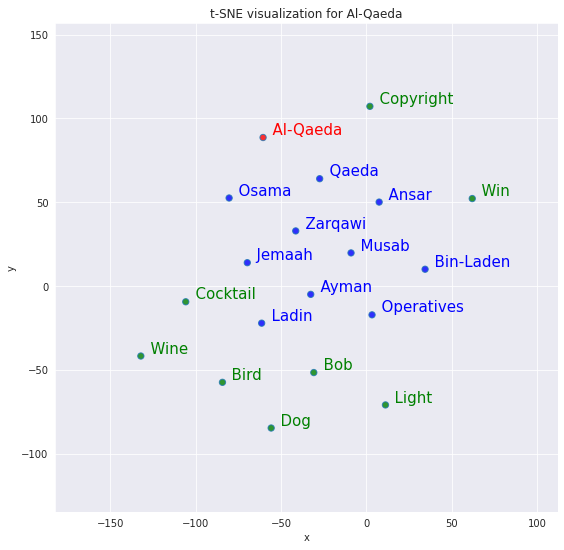

In [ ]:
# 10 most similar vs 8 random
tsnescatterplot(model, 'al-qaeda', ['dog', 'bird', 'copyright', 'wine', 'bob', 'cocktail', 'win', 'light'])

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


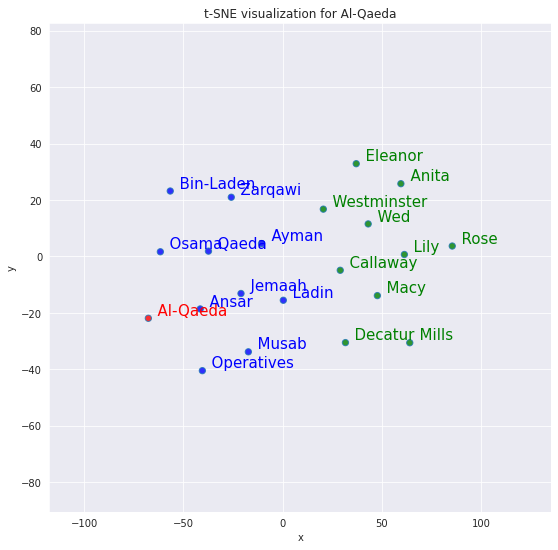

In [ ]:
# 10 most similar vs 10 most dissimilar
tsnescatterplot(model, 'al-qaeda', [i[0] for i in model.wv.most_similar(negative=["al-qaeda"])])

In [ ]:
# 10 Most similar words vs. 11th to 20th Most similar words
# tsnescatterplot(model, "al-qaeda", [t[0] for t in model.wv.most_similar(positive=["al-qaeda"], topn=20)][10:])

### Bin-Laden

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


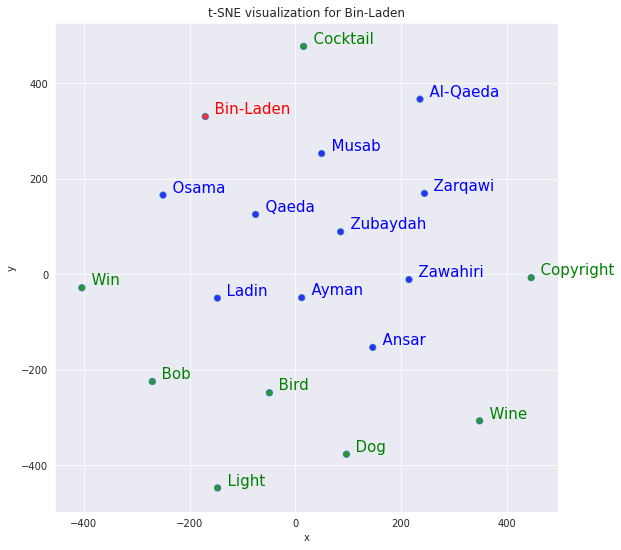

In [ ]:
# 10 most similar vs 8 random
tsnescatterplot(model, 'bin-laden', ['dog', 'bird', 'copyright', 'wine', 'bob', 'cocktail', 'win', 'light'])

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


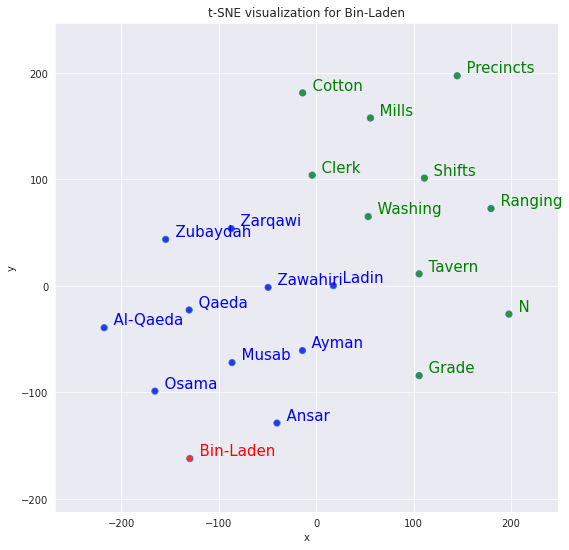

In [ ]:
# 10 most similar vs 10 most dissimilar
tsnescatterplot(model, 'bin-laden', [i[0] for i in model.wv.most_similar(negative=["bin-laden"])])

In [ ]:
# 10 Most similar words vs. 11th to 20th Most similar words
# tsnescatterplot(model, "bin-laden", [t[0] for t in model.wv.most_similar(positive=["bin-laden"], topn=20)][10:])

### Twin-towers

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


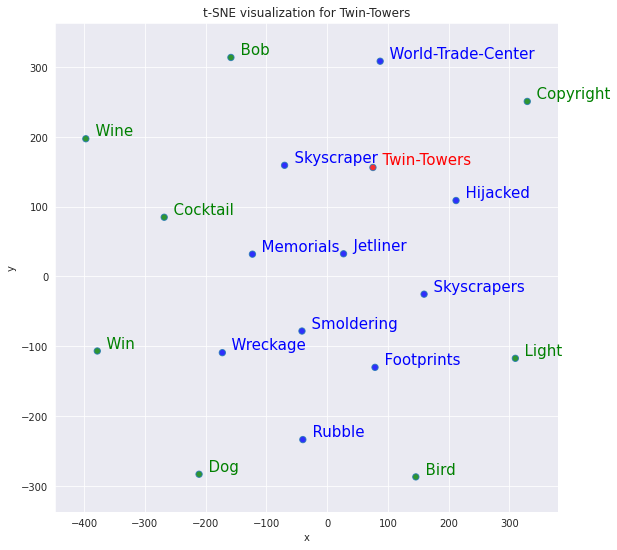

In [ ]:
# 10 most similar vs 8 random
tsnescatterplot(model, 'twin-towers', ['dog', 'bird', 'copyright', 'wine', 'bob', 'cocktail', 'win', 'light'])

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


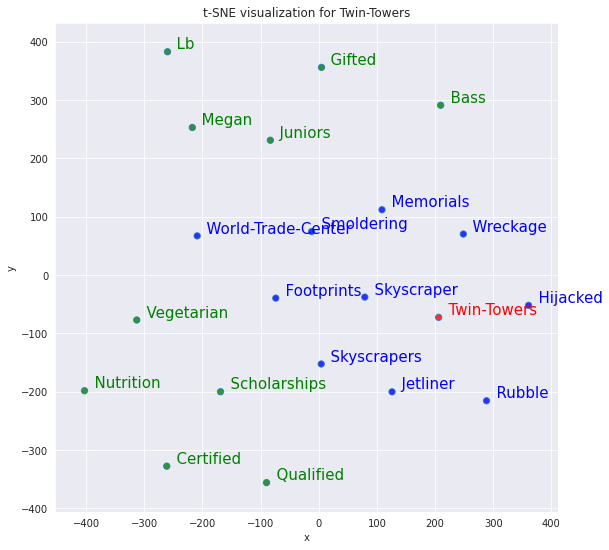

In [ ]:
# 10 most similar vs 10 most dissimilar
tsnescatterplot(model, 'twin-towers', [i[0] for i in model.wv.most_similar(negative=["twin-towers"])])

In [ ]:
# 10 Most similar words vs. 11th to 20th Most similar words
# tsnescatterplot(model, "twin-towers", [t[0] for t in model.wv.most_similar(positive=["twin-towers"], topn=20)][10:])

### Airplane

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


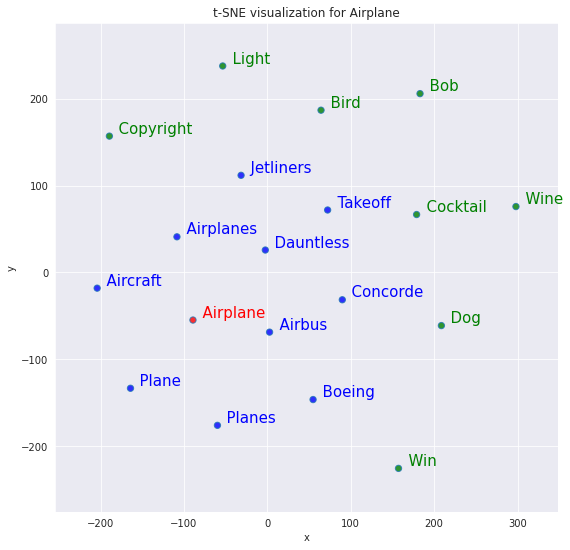

In [ ]:
# 10 most similar vs 8 random
tsnescatterplot(model, 'airplane', ['dog', 'bird', 'copyright', 'wine', 'bob', 'cocktail', 'win', 'light'])

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


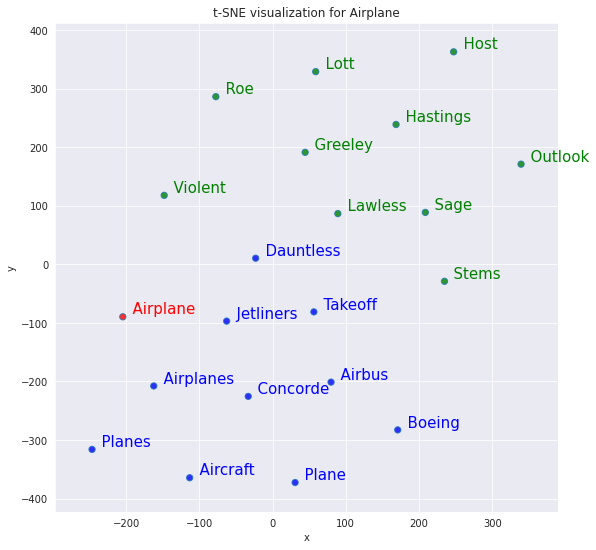

In [ ]:
# 10 most similar vs 10 most dissimilar
tsnescatterplot(model, 'airplane', [i[0] for i in model.wv.most_similar(negative=["airplane"])])

In [ ]:
# 10 Most similar words vs. 11th to 20th Most similar words
# tsnescatterplot(model, "airplane", [t[0] for t in model.wv.most_similar(positive=["airplane"], topn=20)][10:])

### World-trade-center


/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


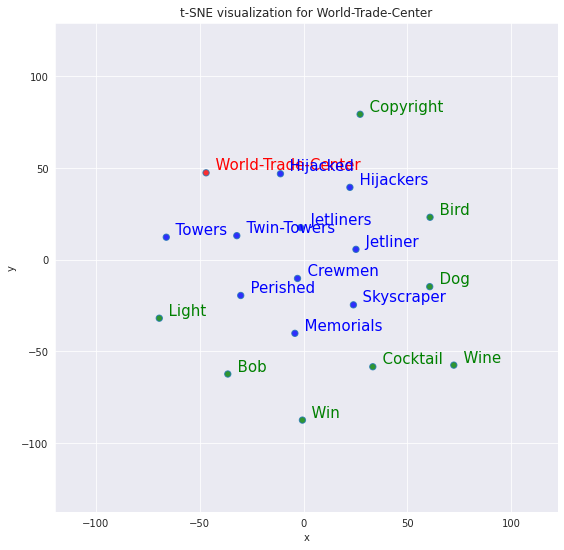

In [ ]:
# 10 most similar vs 8 random
tsnescatterplot(model, 'world-trade-center', ['dog', 'bird', 'copyright', 'wine', 'bob', 'cocktail', 'win', 'light'])

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


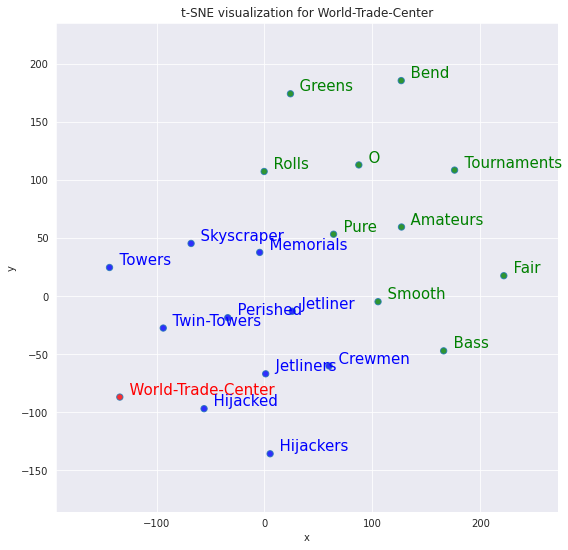

In [ ]:
# 10 most similar vs 10 most dissimilar
tsnescatterplot(model, 'world-trade-center', [i[0] for i in model.wv.most_similar(negative=["world-trade-center"])])

In [ ]:
# 10 Most similar words vs. 11th to 20th Most similar words
# tsnescatterplot(model, "world-trade-center", [t[0] for t in model.wv.most_similar(positive=["world-trade-center"], topn=20)][10:])

### Jihad

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


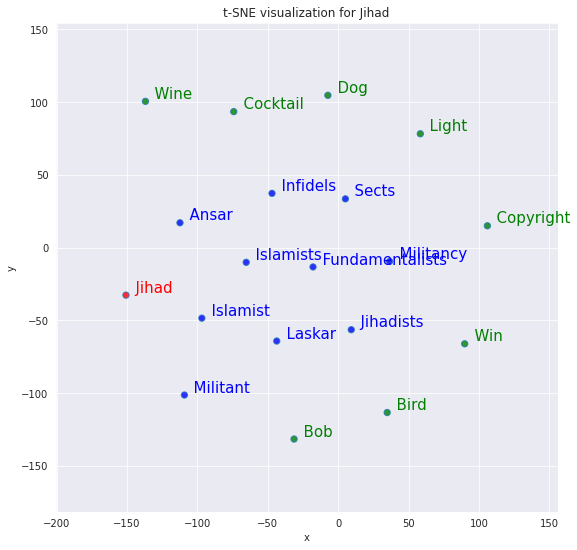

In [ ]:
# 10 most similar vs 8 random
tsnescatterplot(model, 'jihad', ['dog', 'bird', 'copyright', 'wine', 'bob', 'cocktail', 'win', 'light'])

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


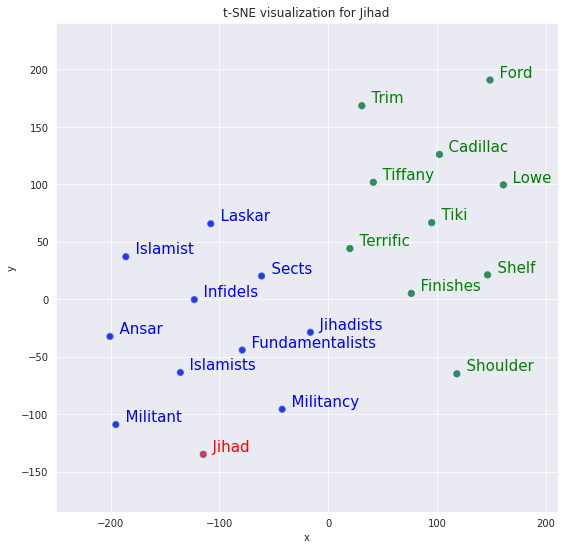

In [ ]:
# 10 most similar vs 10 most dissimilar
tsnescatterplot(model, 'jihad', [i[0] for i in model.wv.most_similar(negative=["jihad"])])

In [ ]:
# 10 Most similar words vs. 11th to 20th Most similar words
# tsnescatterplot(model, "jihad", [t[0] for t in model.wv.most_similar(positive=["jihad"], topn=20)][10:])

## Most similar words to a list of words

In [ ]:
keys = ['terrorism', 'twin-towers', 'airplane', 'world-trade-center']



embedding_clusters = []
word_clusters = []
for word in keys:
    embeddings = []
    words = []
    for similar_word, _ in model.most_similar(word, topn=30):
        words.append(similar_word)
        embeddings.append(model[similar_word])
    embedding_clusters.append(embeddings)
    word_clusters.append(words)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  if sys.path[0] == '':


In [ ]:
from sklearn.manifold import TSNE
import numpy as np

embedding_clusters = np.array(embedding_clusters)
n, m, k = embedding_clusters.shape
tsne_model_en_2d = TSNE(perplexity=15, n_components=2, init='pca', n_iter=3500, random_state=32)
embeddings_en_2d = np.array(tsne_model_en_2d.fit_transform(embedding_clusters.reshape(n * m, k))).reshape(n, m, 2)

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:986: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  FutureWarning,


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB o

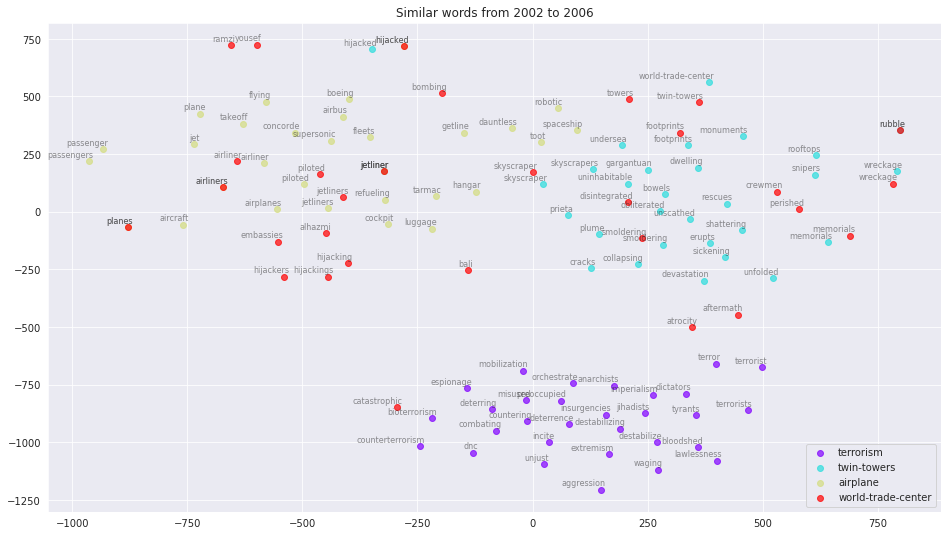

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm
% matplotlib inline


def tsne_plot_similar_words(title, labels, embedding_clusters, word_clusters, a, filename=None):
    plt.figure(figsize=(16, 9))
    colors = cm.rainbow(np.linspace(0, 1, len(labels)))
    for label, embeddings, words, color in zip(labels, embedding_clusters, word_clusters, colors):
        x = embeddings[:, 0]
        y = embeddings[:, 1]
        plt.scatter(x, y, c=color, alpha=a, label=label)
        for i, word in enumerate(words):
            plt.annotate(word, alpha=0.5, xy=(x[i], y[i]), xytext=(5, 2),
                         textcoords='offset points', ha='right', va='bottom', size=8)
    plt.legend(loc=4)
    plt.title(title)
    plt.grid(True)
    if filename:
        plt.savefig(filename, format='png', dpi=150, bbox_inches='tight')
    plt.show()


tsne_plot_similar_words('Similar words from 2002 to 2006', keys, embeddings_en_2d, word_clusters, 0.7,
                        'similar_words_post2001.png')

# Save text file for CADE

In [ ]:
listw2v = list(support_dict.values())

with open("file0206.txt", "w") as output:
  for i in range(len(listw2v)):
    for j in range(len(listw2v[i])):
      if j == 0:
        output.write("%s" % listw2v[i][j])
      else:
        output.write(" %s" % listw2v[i][j])
    output.write("\n")